In [36]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
datos = pd.read_csv("/content/drive/My Drive/Entrenamieto_ECI_2020.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [45]:
datos = datos.loc[(datos["Stage"] == "Closed Won") | (datos["Stage"] == "Closed Lost")]

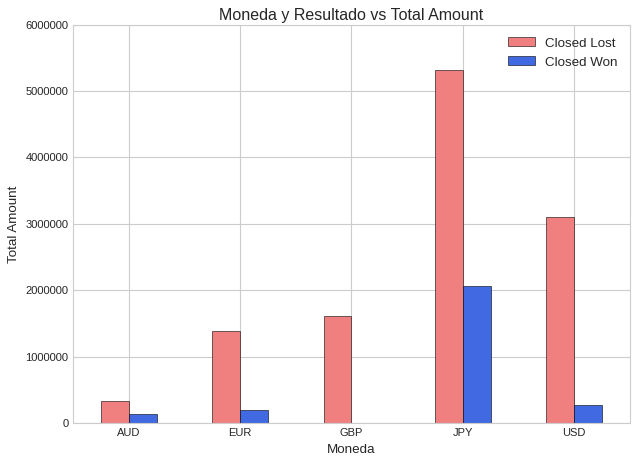

In [127]:
datos.groupby(["Total_Amount_Currency","Stage"]).agg({"Total_Amount" : "mean"}).unstack().plot(kind="bar",color = ["lightcoral","royalblue"])
plt.title("Moneda y Resultado vs Total Amount")
plt.xlabel("Moneda")
plt.ylabel("Total Amount")
plt.xticks(rotation = 0)
plt.legend(["Closed Lost","Closed Won"])
plt.show()

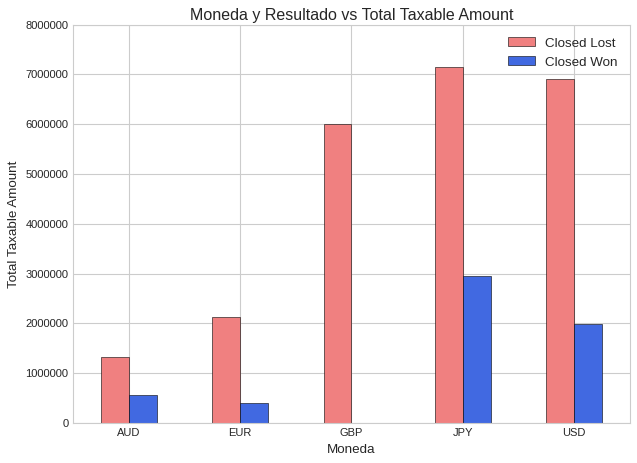

In [128]:
datos.groupby(["Total_Amount_Currency","Stage"]).agg({"Total_Taxable_Amount" : "mean"}).unstack().plot(kind="bar",color = ["lightcoral","royalblue"])
plt.title("Moneda y Resultado vs Total Taxable Amount")
plt.xlabel("Moneda")
plt.ylabel("Total Taxable Amount")
plt.xticks(rotation = 0)
plt.legend(["Closed Lost","Closed Won"])
plt.show()

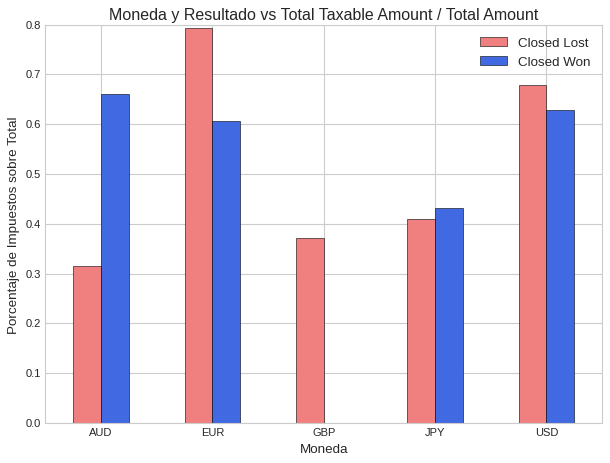

In [129]:
datos = datos.loc[datos["Total_Taxable_Amount"] > 0]
datos["Porcentaje_Taxes"] = datos["Total_Amount"] / datos["Total_Taxable_Amount"]
datos.groupby(["Total_Amount_Currency","Stage"]).agg({"Porcentaje_Taxes" : "mean"}).unstack().plot(kind="bar",color = ["lightcoral","royalblue"])
plt.title("Moneda y Resultado vs Total Taxable Amount / Total Amount")
plt.xlabel("Moneda")
plt.ylabel("Porcentaje de Impuestos sobre Total")
plt.xticks(rotation = 0)
plt.legend(["Closed Lost","Closed Won"])
style.use("seaborn-deep")
plt.show()